In [95]:
!pip install -U scikit-learn

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [120]:
# setting randomseed
np.random.seed(0)

#data generation v & x
v = np.random.normal(25, 8, 2000)
x = np.linspace(10, 80, len(v))
#v = np.linspace(1, 50, 200)
#x = np.random.normal(45, 10, len(v))
x_rad = x*((np.pi/180))

data = np.column_stack((v,x))

# data_set: height = (v^2*(sin(x))^2)/(2*9.8)
height = (v**2 * (np.sin(x_rad))**2) / (2 * 9.8)

# data_set: distance = (v^2*(sin(2*x)))/(9.8)
distance = (v**2 * np.sin(2*x_rad)) / 9.8

value = np.column_stack((distance,height))

# splitting dataset to training set and testing set 
data_train, data_test, value_train, value_test = train_test_split(data, value, test_size=0.2, random_state=42)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, )
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.0075), loss='mse', metrics='accuracy')

In [122]:
history = model.fit(data_train, value_train, validation_split = 0.2, epochs=200, batch_size=2)

Epoch 1/200
640/640 [==============================] - 2s 2ms/step - loss: 420.8936 - accuracy: 0.9289 - val_loss: 200.3551 - val_accuracy: 0.9531
Epoch 2/200
640/640 [==============================] - 1s 2ms/step - loss: 215.1724 - accuracy: 0.9352 - val_loss: 154.1945 - val_accuracy: 0.9531
Epoch 3/200
640/640 [==============================] - 1s 2ms/step - loss: 154.9297 - accuracy: 0.9422 - val_loss: 143.3564 - val_accuracy: 0.9531
Epoch 4/200
640/640 [==============================] - 1s 2ms/step - loss: 126.6577 - accuracy: 0.9375 - val_loss: 90.5728 - val_accuracy: 0.9531
Epoch 5/200
640/640 [==============================] - 1s 2ms/step - loss: 109.8347 - accuracy: 0.9391 - val_loss: 95.6262 - val_accuracy: 0.9531
Epoch 6/200
640/640 [==============================] - 1s 2ms/step - loss: 113.1487 - accuracy: 0.9297 - val_loss: 70.5860 - val_accuracy: 0.9281
Epoch 7/200
640/640 [==============================] - 1s 2ms/step - loss: 101.6407 - accuracy: 0.9289 - val_loss: 81.252

13/13 [==============================] - 0s 2ms/step - loss: 14.4835 - accuracy: 0.9875


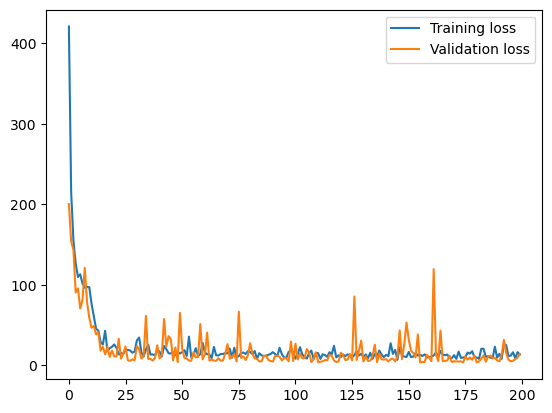

In [123]:
# evaluate model
model.evaluate(data_test, value_test)

# drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [46]:
# def plot_scatter_distance_to_velocity (data_set, y_pred, y):
#     plt.figure(figsize=(5, 5));
#     plt.scatter(data_set[:,0], y_pred[:,0], color="blue", marker="x")
#     plt.scatter(data_set[:,0], y[:,0], marker="o", color="red")
#     plt.xlabel("velocity")
#     plt.ylabel("distance")
#     plt.show()

# def plot_scatter_distance_to_angle (data_set, y_pred, y):
#     plt.figure(figsize=(5, 5));
#     plt.scatter(data_set[:,1], y_pred[:,0], color="blue", marker="x")
#     plt.scatter(data_set[:,1], y[:,0], marker="o", color="red")
#     plt.xlabel("angle")
#     plt.ylabel("distance")
#     plt.show()

# def plot_scatter_height_to_velocity (data_set, y_pred, y):
#     plt.figure(figsize=(5, 5));
#     plt.scatter(data_set[:,0], y_pred[:,1], color="blue", marker="x")
#     plt.scatter(data_set[:,0], y[:,1], marker="o", color="red")
#     plt.xlabel("velocity")
#     plt.ylabel("height")
#     plt.show()

# def plot_scatter_height_to_angle (data_set, y_pred, y):
#     plt.figure(figsize=(5, 5));
#     plt.scatter(data_set[:,1], y_pred[:,1], color="blue", marker="x")
#     plt.scatter(data_set[:,1], y[:,1], marker="o", color="red")
#     plt.xlabel("angle")
#     plt.ylabel("height")
#     plt.show()

# plot_scatter_distance_to_velocity(data_train,model.predict(data_train),value_train)
# plot_scatter_distance_to_angle(data_train,model.predict(data_train),value_train)
# plot_scatter_height_to_velocity(data_train,model.predict(data_train),value_train)
# plot_scatter_height_to_angle(data_train,model.predict(data_train),value_train)

5/5 [==============================] - 0s 2ms/step


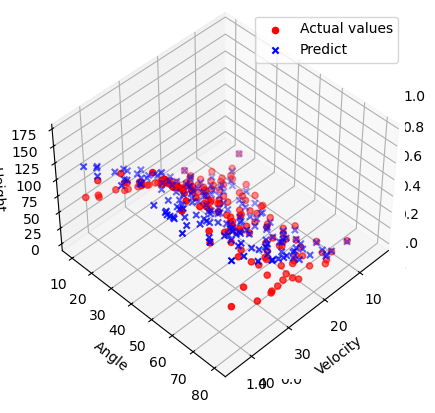

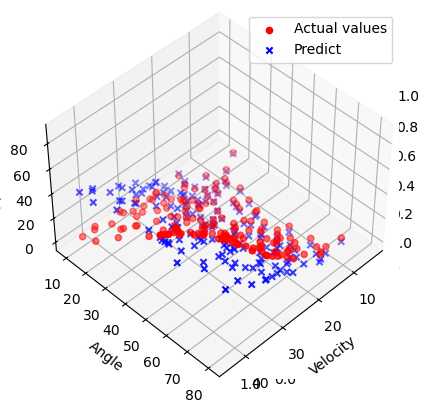

In [118]:
#drawing pictures
def three_dimension_picture_distance(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(45, 45)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,0]
    
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Angle')
    ax.set_zlabel('Height')
    
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,0]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')
    plt.legend()

def three_dimension_picture_height(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(45, 45)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,1]
    
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Angle')
    ax.set_zlabel('Height')
    
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,1]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')
    plt.legend()
    
three_dimension_picture_distance(data_train,model.predict(data_train),value_train)
three_dimension_picture_height(data_train,model.predict(data_train),value_train)


In [124]:
from sklearn.metrics.pairwise import cosine_similarity

def r_of_distance():
    Pearson = cosine_similarity([model.predict(data_train)[:,0], value_train[:,0]])
    print(Pearson[0,1])       
           
def r_of_height():
    Pearson = cosine_similarity([model.predict(data_train)[:,1], value_train[:,1]])
    print(Pearson[0,1])

r_of_distance()
r_of_height()


50/50 [==============================] - 0s 1ms/step
0.9987551663469598
50/50 [==============================] - 0s 1ms/step
0.9973994419374724


In [28]:
data_train #[v,x]

array([[ 67.85714286,  27.14285714],
       [ 39.28571429,  15.71428571],
       [157.14285714,  62.85714286],
       [ 53.57142857,  21.42857143],
       [ 35.71428571,  14.28571429],
       [ 46.42857143,  18.57142857],
       [171.42857143,  68.57142857],
       [189.28571429,  75.71428571],
       [192.85714286,  77.14285714],
       [ 78.57142857,  31.42857143],
       [ 57.14285714,  22.85714286],
       [ 82.14285714,  32.85714286],
       [110.71428571,  44.28571429],
       [146.42857143,  58.57142857],
       [135.71428571,  54.28571429],
       [ 25.        ,  10.        ],
       [182.14285714,  72.85714286],
       [121.42857143,  48.57142857],
       [142.85714286,  57.14285714],
       [ 42.85714286,  17.14285714],
       [128.57142857,  51.42857143],
       [ 64.28571429,  25.71428571],
       [153.57142857,  61.42857143],
       [ 28.57142857,  11.42857143],
       [100.        ,  40.        ],
       [ 32.14285714,  12.85714286],
       [178.57142857,  71.42857143],
 

In [18]:
np.set_printoptions(suppress=True)
value_train #[real_distance,real_height]

array([[63.72824118, 15.33012996],
       [38.21052577,  3.17851567],
       [62.22954   , 12.45460782],
       ...,
       [62.85058837, 13.23833644],
       [53.97761393, 24.43553852],
       [63.01461519, 18.3994067 ]])

In [17]:
model.predict(data_train) #[predict_distance,predict_height]

50/50 [==============================] - 0s 1ms/step


array([[49.157417, 15.636248],
       [49.157417, 15.636248],
       [49.157417, 15.636248],
       ...,
       [49.157417, 15.636248],
       [49.157417, 15.636248],
       [49.157417, 15.636248]], dtype=float32)

In [135]:
#showing the predicting consequence

v_input = float(input("initial_velocity（m/s）："))
x_input = float(input("initial_angle（degree）："))

x_rad_input = x_input * (np.pi / 180)

distance_t = (v_input**2 * np.sin(2*x_rad_input)) / 9.8
height_t = (v_input**2 * (np.sin(x_rad_input))**2) / (2 * 9.8)

print('(1)real_distance: ', distance_t)
print('(2)real_height: ', height_t)

predicted_values = model.predict(np.array([[v_input, x_input]]))[0]
predict_distance = predicted_values[0]
predict_height = predicted_values[1]

print('(3)predict_distance: ', predict_distance)
print('(4)predict_height: ', predict_height)

initial_velocity（m/s）： 30
initial_angle（degree）： 50


(1)real_distance:  90.44152833785583
(2)real_height:  26.946004079087682
1/1 [==============================] - 0s 18ms/step
(3)predict_distance:  94.09363
(4)predict_height:  26.349766
